In [6]:
from PIL import Image,ImageOps
import numpy as np
import pytesseract
import cv2
import os

In [9]:
import cv2 
inp_image=cv2.imread('cropTextImg\cropTextImg\portion_1.png')
# cv2.imshow('Sample Image',inp_image)

# cv2.waitKey(0) # waits until key 0 is pressed
# cv2.destroyAllWindows() # destroys the window showing image
# # # textCheck(inp_image)


TypeError: Image data of dtype object cannot be converted to float

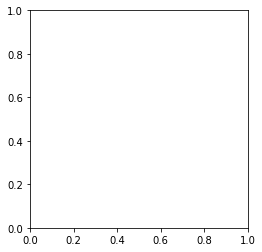

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
# figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(inp_image)


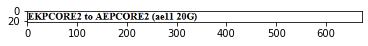

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('portion_1_1.png')
imgplot = plt.imshow(img)
plt.show()

In [43]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [13]:
images=load_images_from_folder('cropTextImg\cropTextImg')
inp_image = images[1]

figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(inp_image)

NameError: name 'load_images_from_folder' is not defined

In [41]:
# """
# Author : Sunil Kumar
# Description : OCR
# """

def remove_noise_and_smooth(img):
    kernel = np.ones((1, 1), np.uint8)
    opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

    or_image = cv2.bitwise_or(img, closing)
    return or_image

def textCheck(imgData):
# """
# Input : Image 
# output : text found in image
# """
    ret,img = cv2.threshold(np.array(imgData), 125, 255, cv2.THRESH_BINARY)

    #remove noise
    img=remove_noise_and_smooth(img)
    new_image = Image.fromarray(img.astype(np.uint8))

    # padding and expansion	
    new_image=ImageOps.expand(new_image,(0,0,0,10),(256,256,256))
    new_image = Image.fromarray(np.array(new_image)).convert('L') #now need gray scale

    basewidth = 900

    new_image = new_image.resize((900,47), Image.ANTIALIAS)

    text = pytesseract.image_to_string(new_image, lang = 'eng')

    return text.strip()



In [50]:

textCheck(inp_image)
# pytesseract.image_to_string('portion_1_1.png')

'EKPCORE2 to AEPCORE? (aell1 20G)'

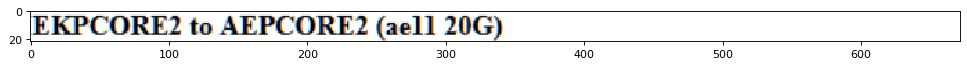

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(inp_image)
